In [14]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt

# Инициализация фигуры для общего графика

colors = {
    "en-ru": "blue",
    "en-fr": "teal",
    "en-hi": "black",
    "en-ar": "purple",
    "en-es": "brown",
    "en-it": "navy"
}

markers = {
    "en-ru": "v",
    "en-fr": "X",
    "en-hi": "8",
    "en-ar": "s",
    "en-es": "d",
    "en-it": "D"
}

In [15]:
XNLI = pd.read_csv('./parallel/ANC_XNLI.txt', sep=';')
# Преобразование строки со значениями в список чисел
XNLI['Value'] = XNLI['Value'].apply(ast.literal_eval)

# Подготовка данных для построения графиков
data_XNLI_by_pair = XNLI.groupby('Language Pair')['Value'].apply(list)

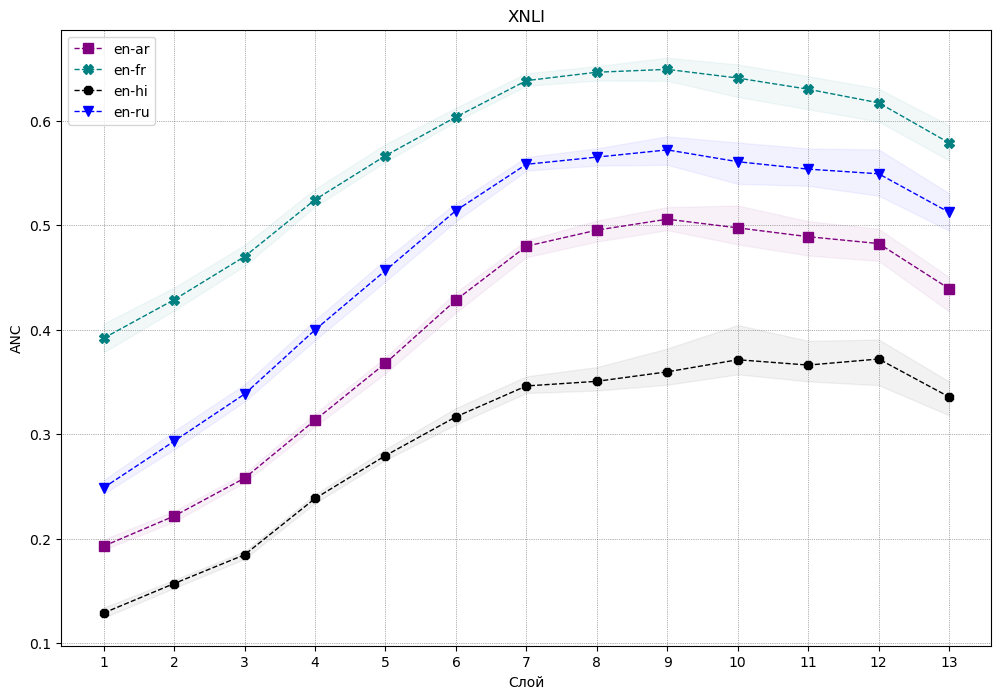

In [16]:
plt.figure(figsize=(12, 8))
for (lang_pair, values) in data_XNLI_by_pair.items():
    # Объединение всех списков значений в один массив для удобства обработки
    values_array = np.array(values)

    # Вычисление минимального, максимального и среднего значения в каждой точке
    min_values = values_array.min(axis=0)
    max_values = values_array.max(axis=0)
    mean_values = values_array.mean(axis=0)

    # Построение графика
    x = range(1, len(mean_values)+1)
    color = colors.get(lang_pair, "grey")
    marker = markers.get(lang_pair, "*")

    plt.plot(x, mean_values, marker=marker, markersize=7, label=f'{lang_pair}', color=color, linewidth=1, linestyle='--')
    plt.fill_between(x, min_values, max_values, color=color, alpha=0.05)

plt.title('XNLI')
plt.xlabel('Слой')
plt.ylabel('ANC')
plt.xticks(range(1, len(mean_values) + 1))
plt.legend()
plt.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)
plt.show()


In [17]:
Readme = pd.read_csv('./parallel/ANC_Readme.txt', sep=';')
# Преобразование строки со значениями в список чисел
Readme['Value'] = Readme['Value'].apply(ast.literal_eval)

# Подготовка данных для построения графиков
data_Readme_by_pair = Readme.groupby('Language Pair')['Value'].apply(list)

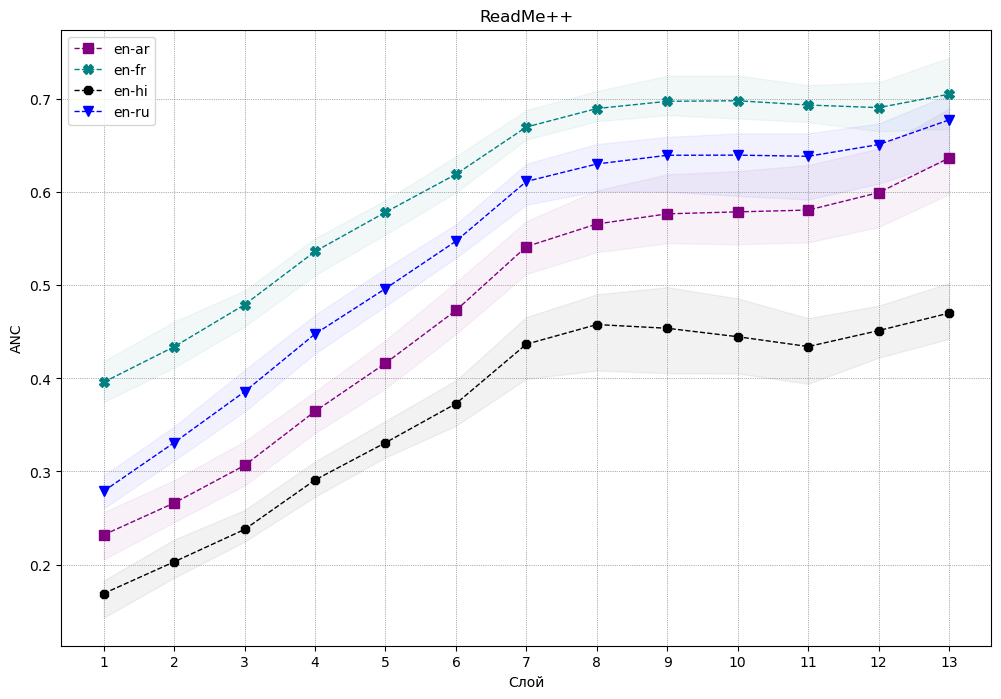

In [18]:
# Инициализация фигуры для общего графика
plt.figure(figsize=(12, 8))


for (lang_pair, values) in data_Readme_by_pair.items():
    # Объединение всех списков значений в один массив для удобства обработки
    values_array = np.array(values)

    # Вычисление минимального, максимального и среднего значения в каждой точке
    min_values = values_array.min(axis=0)
    max_values = values_array.max(axis=0)
    mean_values = values_array.mean(axis=0)

    # Построение графика
    x = range(1, len(mean_values)+1)
    color = colors.get(lang_pair, "grey")
    marker = markers.get(lang_pair, "*")

    plt.plot(x, mean_values, marker=marker, markersize=7, label=f'{lang_pair}', color=color, linewidth=1, linestyle='--')
    plt.fill_between(x, min_values, max_values, color=color, alpha=0.05)

plt.title('ReadMe++')
plt.xlabel('Слой')
plt.ylabel('ANC')
plt.xticks(range(1, len(mean_values) + 1))
plt.legend()
plt.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)
plt.show()

In [19]:
VvsW = pd.read_csv('./parallel/ANC_VvsW.txt', sep=';')
# Преобразование строки со значениями в список чисел
VvsW['Value'] = VvsW['Value'].apply(ast.literal_eval)

# Подготовка данных для построения графиков
data_VvsW_by_pair = VvsW.groupby('Language Pair')['Value'].apply(list)

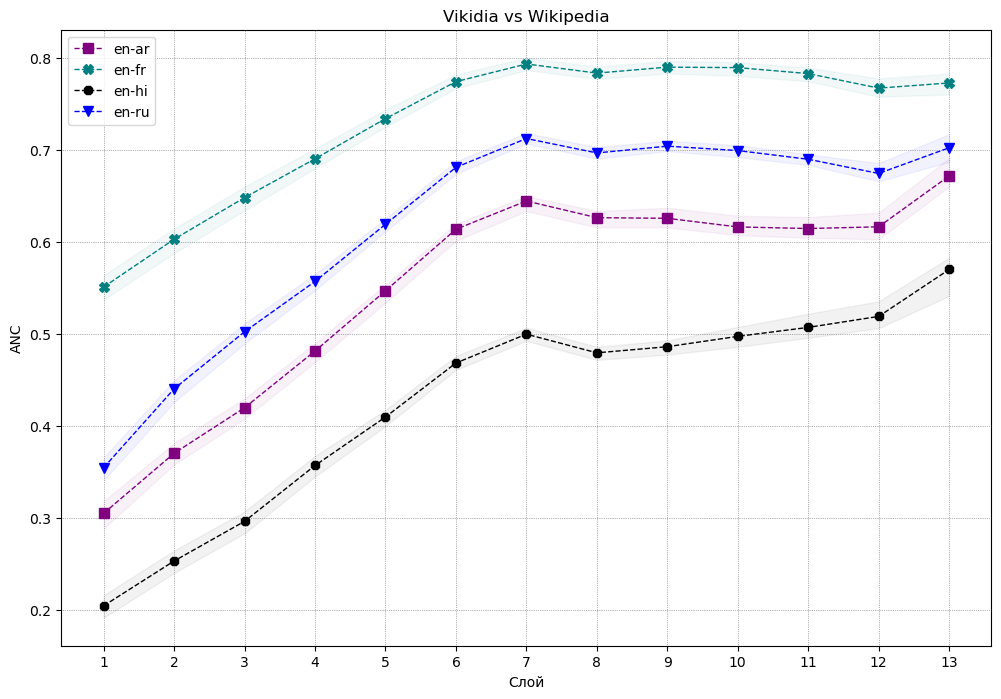

In [20]:
# Инициализация фигуры для общего графика
plt.figure(figsize=(12, 8))


for (lang_pair, values) in data_VvsW_by_pair.items():
    # Объединение всех списков значений в один массив для удобства обработки
    values_array = np.array(values)

    # Вычисление минимального, максимального и среднего значения в каждой точке
    min_values = values_array.min(axis=0)
    max_values = values_array.max(axis=0)
    mean_values = values_array.mean(axis=0)

    # Построение графика
    x = range(1, len(mean_values)+1)
    color = colors.get(lang_pair, "grey")
    marker = markers.get(lang_pair, "*")

    plt.plot(x, mean_values, marker=marker, markersize=7, label=f'{lang_pair}', color=color, linewidth=1, linestyle='--')
    plt.fill_between(x, min_values, max_values, color=color, alpha=0.05)

plt.title('Vikidia vs Wikipedia')
plt.xlabel('Слой')
plt.ylabel('ANC')
plt.xticks(range(1, len(mean_values) + 1))
plt.legend()
plt.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)
plt.show()

In [21]:
data_dict = {'XNLI': data_XNLI_by_pair, 'Readme++': data_Readme_by_pair, 'Vikidia vs Wikipedia': data_VvsW_by_pair}

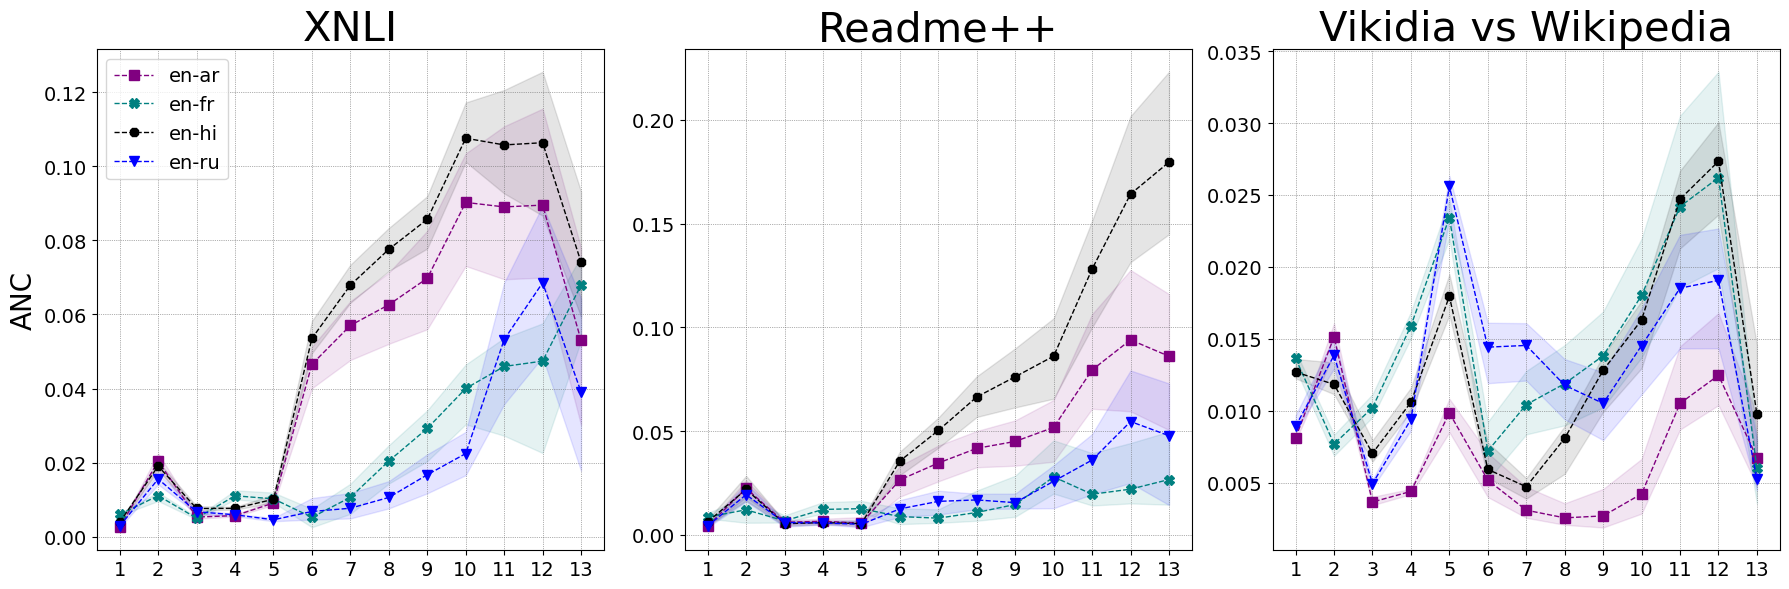

In [55]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Пример итерации по трем различным наборам данных
for idx, (data_key, data_value) in enumerate(data_dict.items()):
    # Выбор текущей оси
    ax = axs[idx]

    # Построение графика на текущей оси
    for (lang_pair, values) in data_value.items():
        values_array = np.array(values)
        min_values = values_array.min(axis=0)
        max_values = values_array.max(axis=0)
        mean_values = values_array.mean(axis=0)
        x = range(1, len(mean_values)+1)
        color = colors.get(lang_pair, "grey")
        marker = markers.get(lang_pair, "*")
        
        ax.plot(x, mean_values, marker=marker, markersize=7, label=f'{lang_pair}', color=color, linewidth=1, linestyle='--')
        ax.fill_between(x, min_values, max_values, color=color, alpha=0.1)

    ax.set_title(data_key, size=30)
    # ax.set_xlabel('Слой', size=20)
    if idx == 0:
        ax.set_ylabel('ANC', size=20)
        ax.legend(fontsize=14)
    ax.set_xticks(range(1, len(mean_values) + 1))
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()


In [23]:
XNLI = pd.read_csv('./parallel/wasserstein_XNLI.txt', sep=';')
# Преобразование строки со значениями в список чисел
XNLI['Value'] = XNLI['Value'].apply(ast.literal_eval)

# Подготовка данных для построения графиков
data_XNLI_by_pair = XNLI.groupby('Language Pair')['Value'].apply(list)

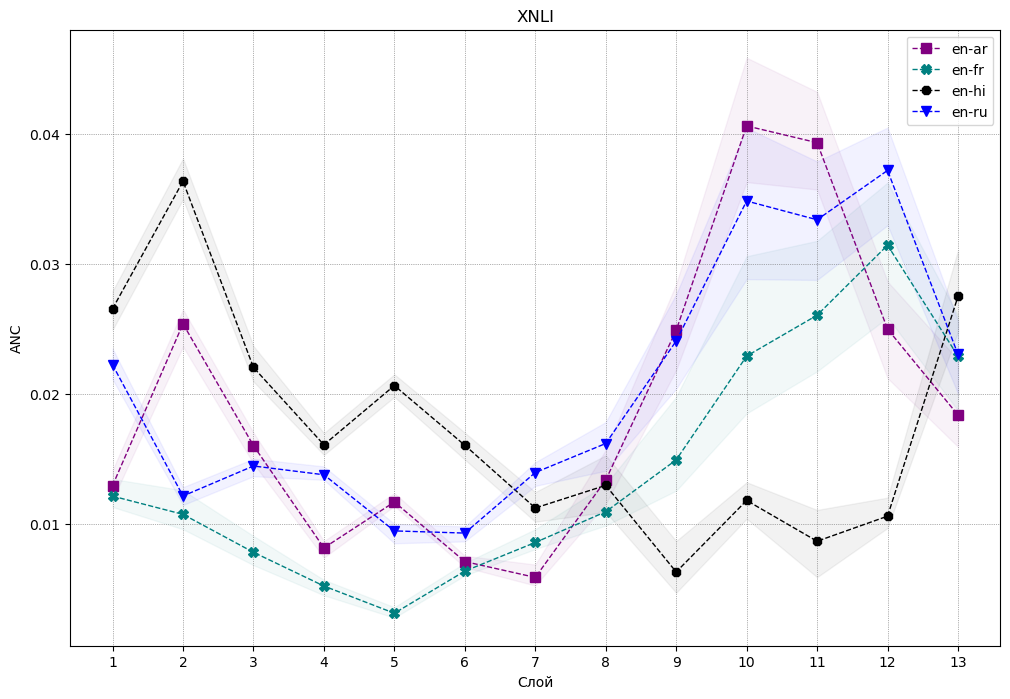

In [24]:
plt.figure(figsize=(12, 8))
for (lang_pair, values) in data_XNLI_by_pair.items():
    # Объединение всех списков значений в один массив для удобства обработки
    values_array = np.array(values)

    # Вычисление минимального, максимального и среднего значения в каждой точке
    min_values = values_array.min(axis=0)
    max_values = values_array.max(axis=0)
    mean_values = values_array.mean(axis=0)

    # Построение графика
    x = range(1, len(mean_values)+1)
    color = colors.get(lang_pair, "grey")
    marker = markers.get(lang_pair, "*")

    plt.plot(x, mean_values, marker=marker, markersize=7, label=f'{lang_pair}', color=color, linewidth=1, linestyle='--')
    plt.fill_between(x, min_values, max_values, color=color, alpha=0.05)

plt.title('XNLI')
plt.xlabel('Слой')
plt.ylabel('ANC')
plt.xticks(range(1, len(mean_values) + 1))
plt.legend()
plt.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)
plt.show()


In [25]:
Readme = pd.read_csv('./parallel/wasserstein_Readme.txt', sep=';')
# Преобразование строки со значениями в список чисел
Readme['Value'] = Readme['Value'].apply(ast.literal_eval)

# Подготовка данных для построения графиков
data_Readme_by_pair = Readme.groupby('Language Pair')['Value'].apply(list)

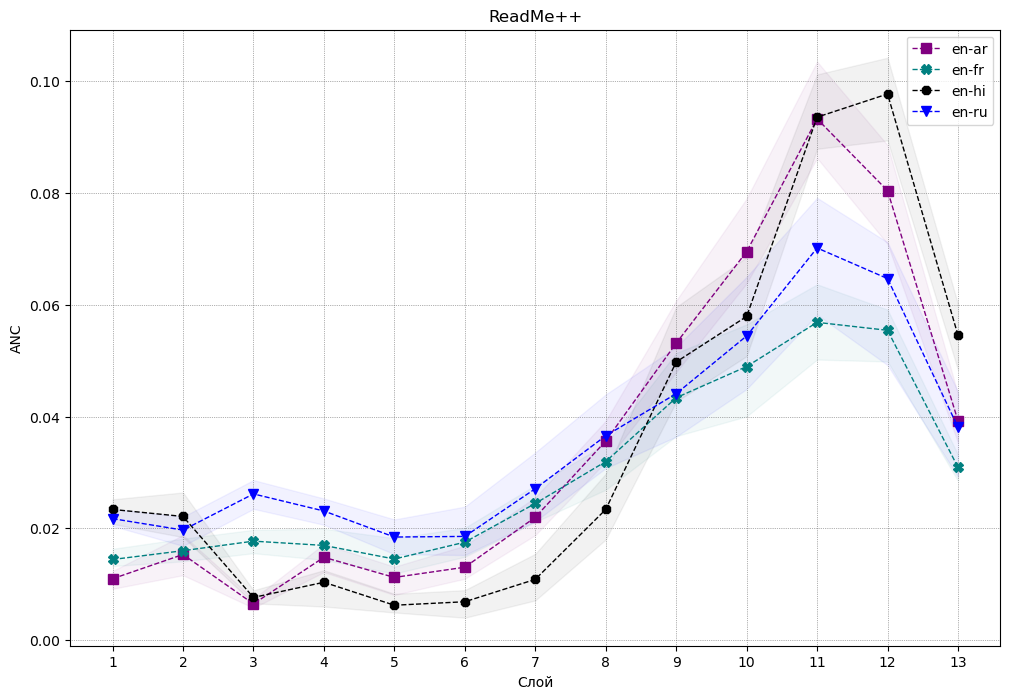

In [26]:
# Инициализация фигуры для общего графика
plt.figure(figsize=(12, 8))


for (lang_pair, values) in data_Readme_by_pair.items():
    # Объединение всех списков значений в один массив для удобства обработки
    values_array = np.array(values)

    # Вычисление минимального, максимального и среднего значения в каждой точке
    min_values = values_array.min(axis=0)
    max_values = values_array.max(axis=0)
    mean_values = values_array.mean(axis=0)

    # Построение графика
    x = range(1, len(mean_values)+1)
    color = colors.get(lang_pair, "grey")
    marker = markers.get(lang_pair, "*")

    plt.plot(x, mean_values, marker=marker, markersize=7, label=f'{lang_pair}', color=color, linewidth=1, linestyle='--')
    plt.fill_between(x, min_values, max_values, color=color, alpha=0.05)

plt.title('ReadMe++')
plt.xlabel('Слой')
plt.ylabel('ANC')
plt.xticks(range(1, len(mean_values) + 1))
plt.legend()
plt.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)
plt.show()

In [27]:
VvsW = pd.read_csv('./parallel/wasserstein_VvsW.txt', sep=';')
# Преобразование строки со значениями в список чисел
VvsW['Value'] = VvsW['Value'].apply(ast.literal_eval)

# Подготовка данных для построения графиков
data_VvsW_by_pair = VvsW.groupby('Language Pair')['Value'].apply(list)

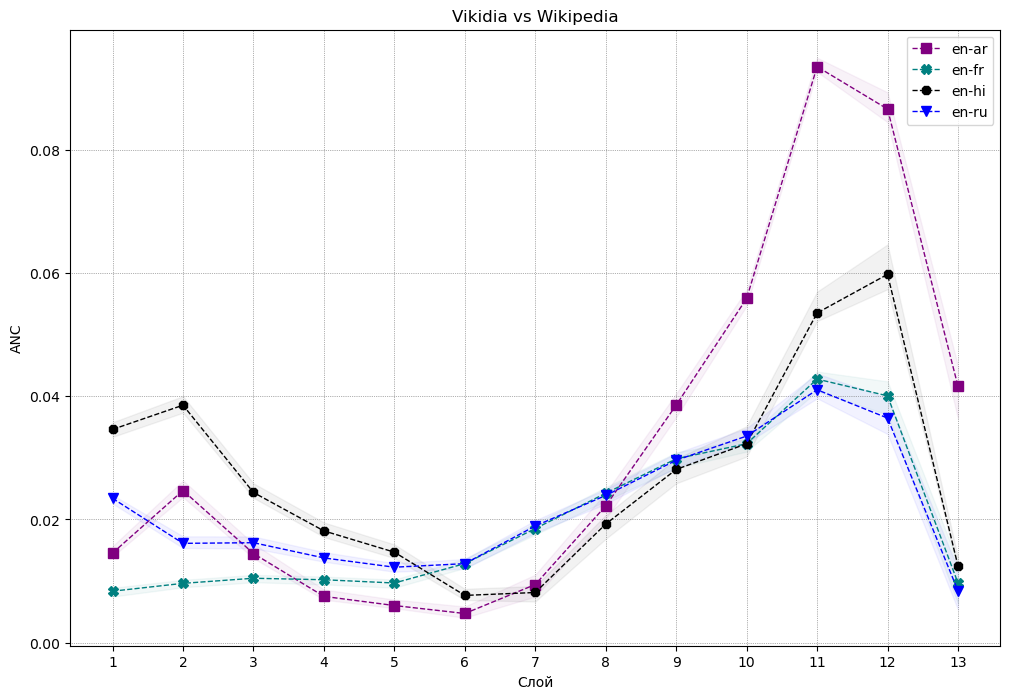

In [28]:
# Инициализация фигуры для общего графика
plt.figure(figsize=(12, 8))


for (lang_pair, values) in data_VvsW_by_pair.items():
    # Объединение всех списков значений в один массив для удобства обработки
    values_array = np.array(values)

    # Вычисление минимального, максимального и среднего значения в каждой точке
    min_values = values_array.min(axis=0)
    max_values = values_array.max(axis=0)
    mean_values = values_array.mean(axis=0)

    # Построение графика
    x = range(1, len(mean_values)+1)
    color = colors.get(lang_pair, "grey")
    marker = markers.get(lang_pair, "*")

    plt.plot(x, mean_values, marker=marker, markersize=7, label=f'{lang_pair}', color=color, linewidth=1, linestyle='--')
    plt.fill_between(x, min_values, max_values, color=color, alpha=0.05)

plt.title('Vikidia vs Wikipedia')
plt.xlabel('Слой')
plt.ylabel('ANC')
plt.xticks(range(1, len(mean_values) + 1))
plt.legend()
plt.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)
plt.show()

In [29]:
data_dict = {'XNLI': data_XNLI_by_pair, 'Readme++': data_Readme_by_pair, 'Vikidia vs Wikipedia': data_VvsW_by_pair}

en-ar 0.024990493523741927
en-fr 0.031441661384349694
en-hi 0.010608725276900422
en-ru 0.03718881176215009
en-ar 0.08043673599322297
en-fr 0.05544464329439425
en-hi 0.09774330656531008
en-ru 0.06470195112334207
en-ar 0.08657004748663796
en-fr 0.04004016024398547
en-hi 0.059750163367859044
en-ru 0.036439800236137736


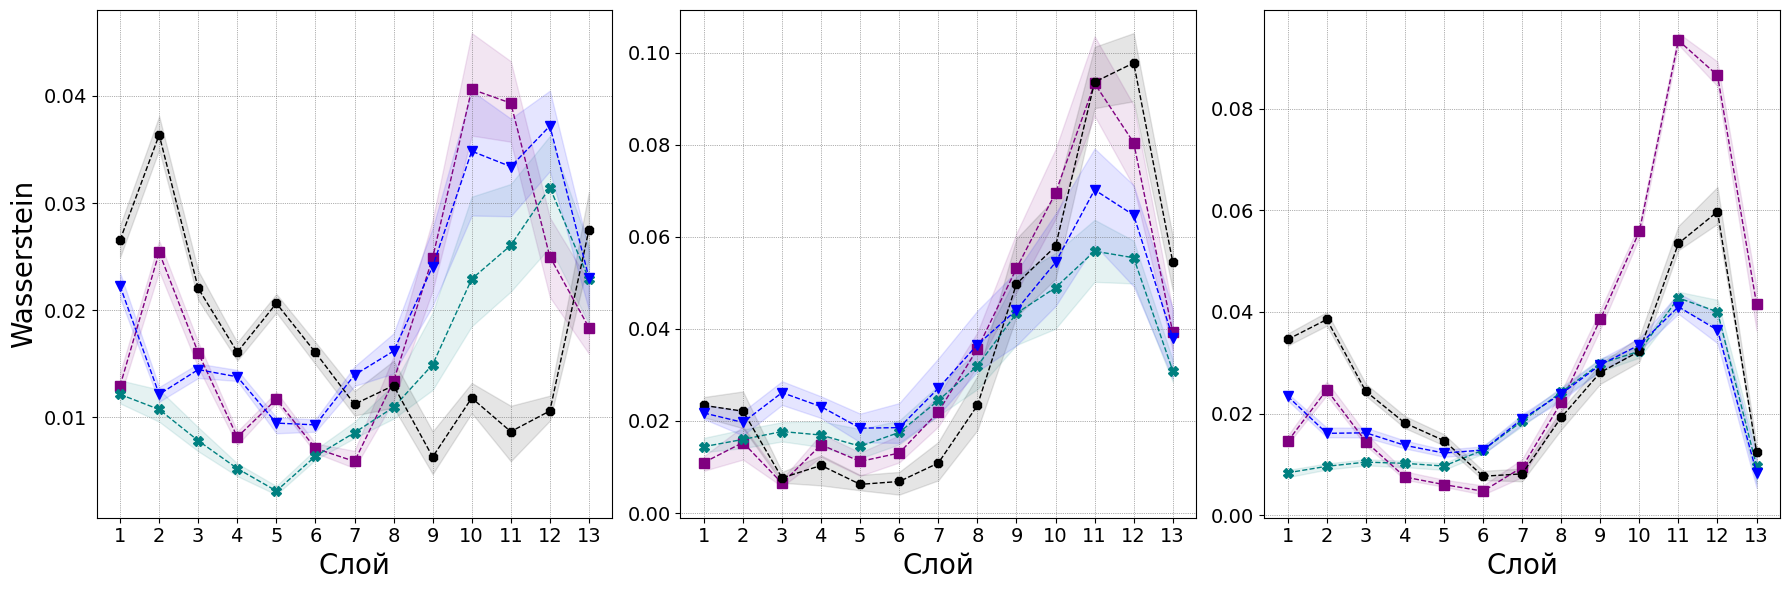

In [30]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Пример итерации по трем различным наборам данных
for idx, (data_key, data_value) in enumerate(data_dict.items()):
    # Выбор текущей оси
    ax = axs[idx]

    # Построение графика на текущей оси
    for (lang_pair, values) in data_value.items():
        values_array = np.array(values)
        min_values = values_array.min(axis=0)
        max_values = values_array.max(axis=0)
        mean_values = values_array.mean(axis=0)
        print(lang_pair, mean_values[-2])
        x = range(1, len(mean_values)+1)
        color = colors.get(lang_pair, "grey")
        marker = markers.get(lang_pair, "*")
        
        ax.plot(x, mean_values, marker=marker, markersize=7, label=f'{lang_pair}', color=color, linewidth=1, linestyle='--')
        ax.fill_between(x, min_values, max_values, color=color, alpha=0.1)

    #ax.set_title(data_key, size=30)
    ax.set_xlabel('Слой', size=20)
    if idx == 0:
        ax.set_ylabel('Wasserstein', size=20)
        #ax.legend(fontsize=14)
    ax.set_xticks(range(1, len(mean_values) + 1))
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()


In [31]:
f1_XNLI = {'en': 0.69, 'ru': 0.55, 'fr': 0.6, 'hi': 0.45, 'ar': 0.51}
f1_Readme = {'en': 0.52, 'ru': 0.44, 'fr': 0.46, 'hi': 0.34, 'ar': 0.41}
f1_VvsW = {'en': 0.87, 'ru': 0.72, 'fr': 0.77, 'hi': 0.61, 'ar': 0.77}


Wasserstein_XNLI = {'ar': 0.025, 'fr': 0.031, 'hi': 0.010, 'ru': 0.037}
Wasserstein_Readme = {'ar': 0.080, 'fr': 0.055, 'hi': 0.098, 'ru': 0.065}
Wasserstein_VvsW = {'ar': 0.087, 'fr': 0.040, 'hi': 0.060, 'ru': 0.037}

ANC_XNLI = {'ar': 0.44, 'fr': 0.58, 'hi': 0.34, 'ru': 0.51}
ANC_Readme = {'ar': 0.64, 'fr': 0.71, 'hi': 0.47, 'ru': 0.68}
ANC_VvsW = {'ar': 0.67, 'fr': 0.77, 'hi': 0.57, 'ru': 0.70}


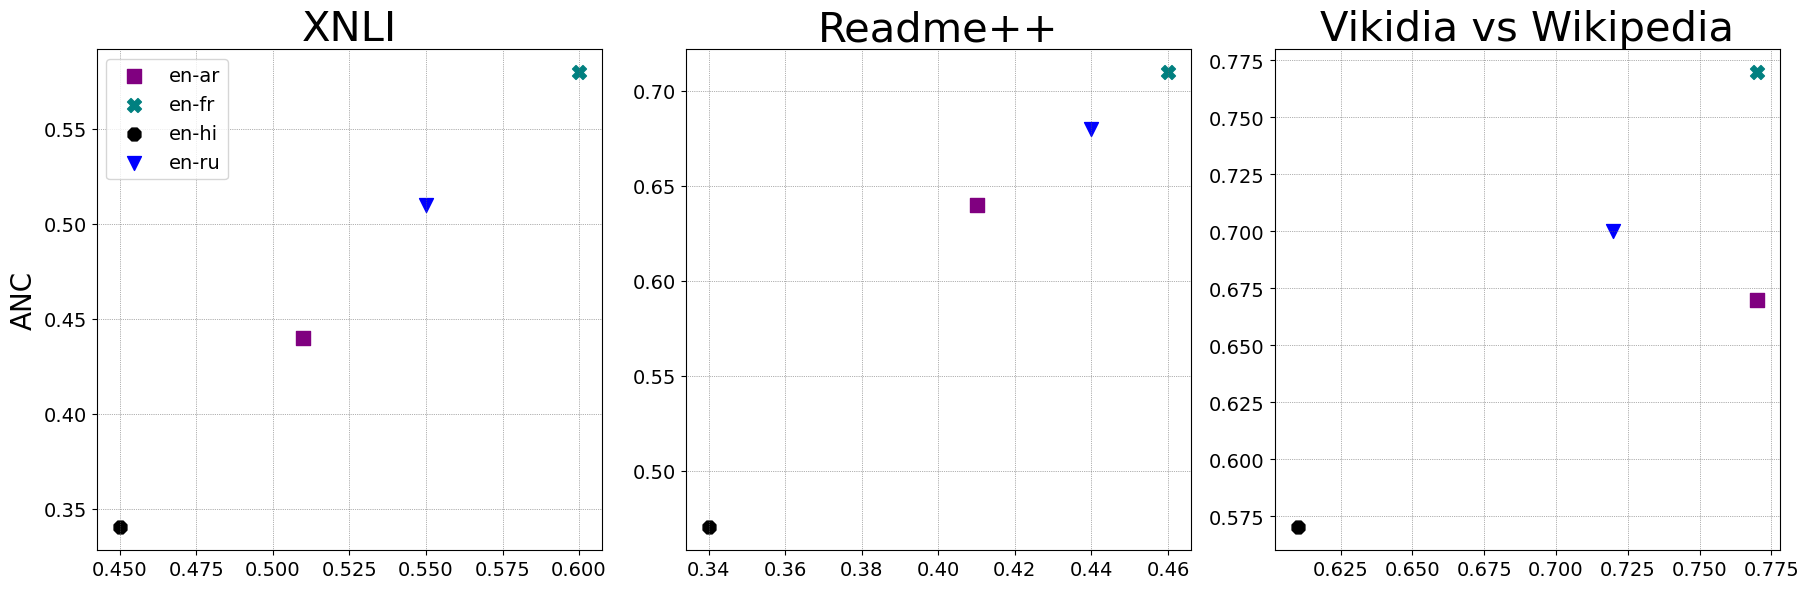

In [32]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

datasets = [("XNLI", f1_XNLI, ANC_XNLI), ("Readme++", f1_Readme, ANC_Readme), ("Vikidia vs Wikipedia", f1_VvsW, ANC_VvsW)]

for idx, (title, f1_dict, anc_dict) in enumerate(datasets):
    ax = axs[idx]
    for lang in anc_dict.keys():
        if lang != 'en':
            color = colors.get(f"en-{lang}", "grey")
            marker = markers.get(f"en-{lang}", "o")
            ax.scatter(f1_dict[lang], anc_dict[lang], color=color, marker=marker, s=100, label=f"en-{lang}")
    
    ax.set_title(title, size=30)
    #ax.set_xlabel("F1 macro", size=20)
    if idx == 0:
        ax.set_ylabel("ANC", size=20)
        ax.legend(fontsize=14, loc='upper left')
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()


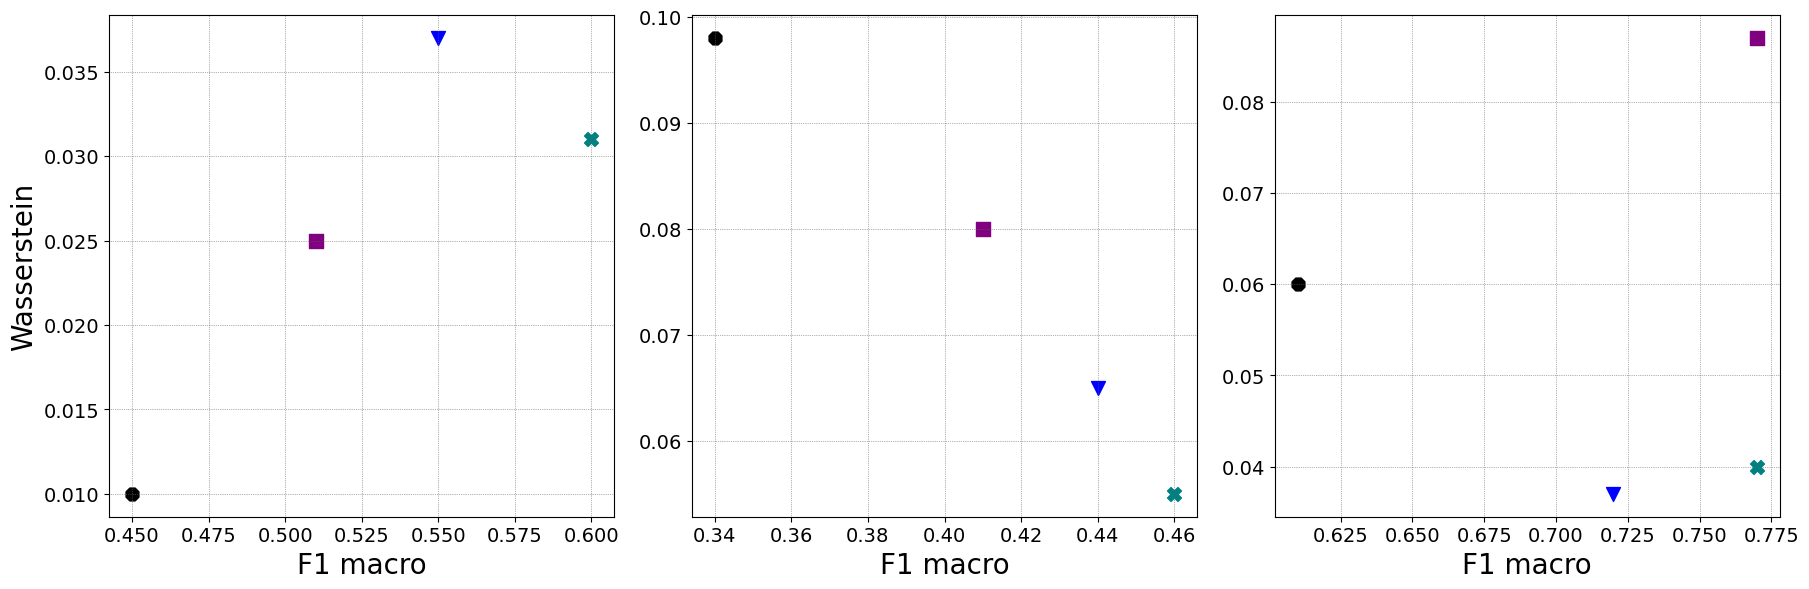

In [33]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

datasets = [("XNLI", f1_XNLI, Wasserstein_XNLI), ("Readme++", f1_Readme, Wasserstein_Readme), ("Vikidia vs Wikipedia", f1_VvsW, Wasserstein_VvsW)]

for idx, (title, f1_dict, anc_dict) in enumerate(datasets):
    ax = axs[idx]
    for lang in anc_dict.keys():
        if lang != 'en':
            color = colors.get(f"en-{lang}", "grey")
            marker = markers.get(f"en-{lang}", "o")
            ax.scatter(f1_dict[lang], anc_dict[lang], color=color, marker=marker, s=100, label=f"en-{lang}")
    
    #ax.set_title(title, size=30)
    ax.set_xlabel("F1 macro", size=20)
    if idx == 0:
        ax.set_ylabel("Wasserstein", size=20)
        #ax.legend(fontsize=14, loc='upper left')
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()
